**To explore Business
Analytics**

Perform ‘Exploratory Data Analysis’ on the provided dataset
‘SampleSuperstore’
You are the business owner of the retail firm and want to see
how your company is performing. You are interested in finding
out the weak areas where you can work to make more profit.
What all business problems you can derive by looking into the
data? You can choose any of the tool of your choice
(Python/ R / Tableau / PowerBI / Excel)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [18]:
import pandas as pd
url='https://raw.githubusercontent.com/zackq88/sparksfoundation_internship/master/SampleSuperstore.csv'
df=pd.read_csv(url)
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [20]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [21]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [22]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [23]:
#Checking for duplicated rows 
df.duplicated().sum()

17

In [24]:
#Removing duplicated rows
df.drop_duplicates(inplace=True)

In [25]:
#1time run
#removing the unimportant columns
df=df.drop(['Country', 'Postal Code'], axis=1)

In [26]:
print(df.shape)

(9977, 11)


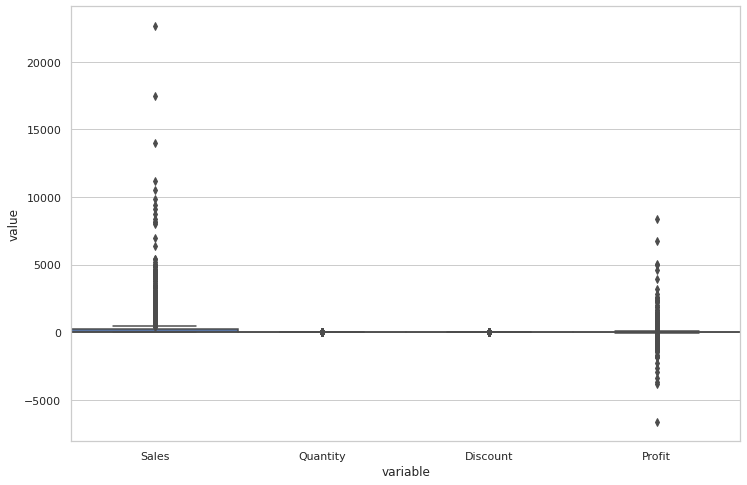

In [30]:
df_con=df.select_dtypes(include=[np.number])
#BoxPlot
plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(df_con), width=1)
plt.show()

In [31]:
data1 = df.groupby(['Ship Mode'])['Discount'].sum().reset_index()
data2 = df.groupby(['Region'])['Discount'].sum().reset_index()
data3 = df.groupby(['Region'], as_index = False, sort = True)['Profit'].mean()
data4 = df.groupby('Category')['Profit','Quantity'].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


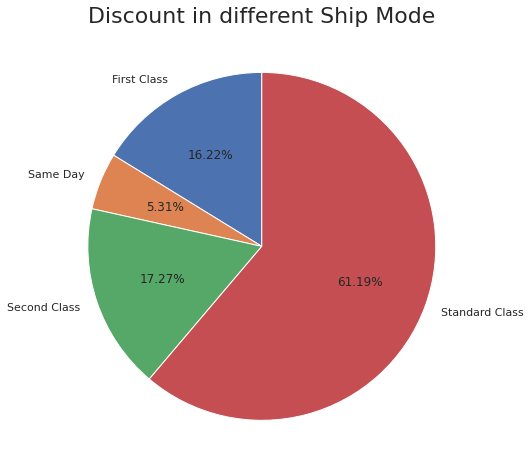

In [32]:
labels = data1['Ship Mode'].values
sizes = data1['Discount'].values
fig1, axis = plt.subplots(figsize=(8,8))
axis.pie(sizes, labels=labels, autopct='%1.2f%%',
        startangle=90)
plt.title('Discount in different Ship Mode', fontsize=22)
plt.show()

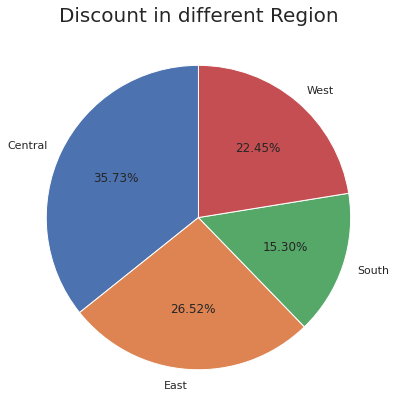

In [33]:
labels = data2['Region'].values
sizes = data2['Discount'].values
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
         startangle=90)
plt.title('Discount in different Region', fontsize=20)
plt.show()

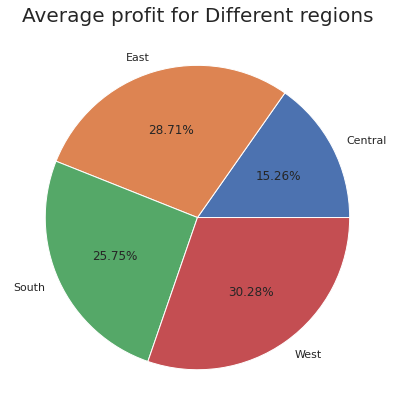

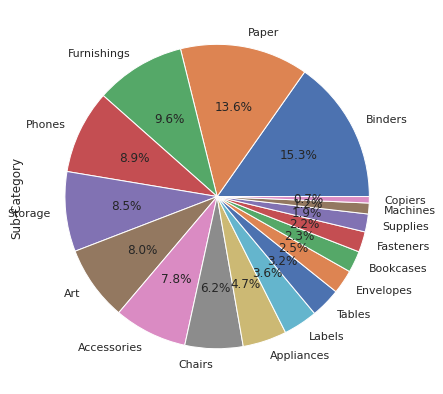

In [34]:
region = data3['Region'].values
profit = data3['Profit'].values
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(profit, labels = region, autopct='%1.2f%%')
plt.title('Average profit for Different regions', fontsize = 20)
plt.figure(figsize = (7, 7))
df['Sub-Category'].value_counts().plot(kind = 'pie', autopct='%1.1f%%' )
plt.show()

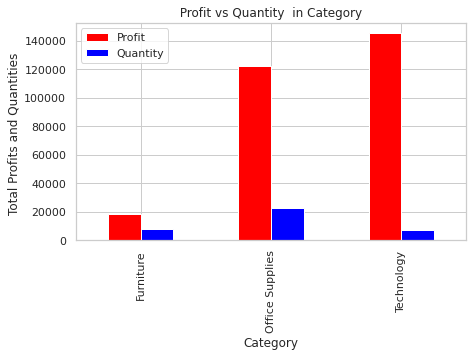

In [35]:
data4.plot( kind ="bar" ,  color = ['red','blue'] , figsize= (7,4))
plt.ylabel("Total Profits and Quantities ")
plt.title(" Profit vs Quantity  in Category ")
plt.legend()
plt.show()

Conclusion : 
Overall scinerio shows large cities, like New York, Los Angeles, Seatle, San Francisco are generating highest amount of Sales as well as Profit. And in case of Categories, Technology is always leading in terms of Sales and Profit. Some useful insights are shown like, some cities are there, where company is giving huge discounts but very less sales and profit is generating. Also there are cities, where discounts are totaly '0', but they are generating high profits. Hence great focus are to be given in those cases. If above mentioned points are taken care of, surely some improvements can be done